## Capstone Project Submission

Please fill out:
* Student name:Sumali Wickramarachchi 
* Student pace: Part time
* Scheduled project review date/time: 12th October 2023
* Instructor name: Rajive Islam
* Blog post URL: N/A


## Business Problem 
In this project, I have developed a predictive model to identify high default risk individuals easily based on certain characteristics. These credit scorecards leverage  data provided by credit card applicants & hisotry to estimate the likelihood of future defaults and credit card usage. Consequently, financial institutions can make informed decisions regarding the issuance of credit cards to applicants, allowing them to objectively quantify potential risks and approve applications easily.

Our workflow commences with the collection and meticulous preparation of credit card applicant data, followed by an exploratory analysis to gain insights into the dataset. Subsequently, we employ feature engineering techniques to improve our model's predictive performance. After partitioning the data into training and testing sets, we implement regression models and fine-tune them to attain optimal results. The final model will undergo thorough testing, deployment, and periodic updates to ensure its continued accuracy and effectiveness.


## 1. Data Understanding, Collection and Preparation 
The dataset comprises comprehensive information on credit card applications and individuals' credit histories, enabling us to discern critical attributes and factors contributing to credit card default among specific groups. This dataset encompasses sociographic data, including education level, annual income, income category, and marital status, alongside demographic details such as age, family size, and status. Additionally, it includes contactability information such as phone and email.

To ensure the dataset's reliability and accuracy, rigorous cleaning and preprocessing steps have been diligently executed. Missing values and outliers have been meticulously addressed and appropriately handled, thereby enhancing the dataset's quality and reliability for subsequent analyses and modeling.


In [1]:
# I have imported necessary packages to perfrom analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
# data file extraction path
data_extract1=r"C:\Users\Sumali\Documents\dsc-phase-3 project capstone\application_record.csv"
application=pd.read_csv(data_extract1)
data_extract2=r"C:\Users\Sumali\Documents\dsc-phase-3 project capstone\credit_record.csv"
credit_status=pd.read_csv(data_extract2)

## 1.1 Data Understanding






In [3]:
#Undertanding nature of application data
application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [4]:
#Undertanding data types of application record data
application.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
#Undertanding nature of credit status data
credit_status.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [6]:
#Understanding data type of credit record data
credit_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## 1.2 Transforming Y Varirable 





Currently we do not have a clear dependant variable to predict whether these applications will get approve or not. Based on data we need a predictor to showcase what continuous variable will lead to credit card default risk and transform the field to predict & showcase approval rate by recognising default risk.

I have decided to classify users who have overdue payments of more than 60 days as the target risk group. These specific samples will be labeled as '1', while all others will be labeled as '0'. This approach will help to narrow down the focus to the subset of users who exhibit a higher risk of credit card default, in line with the desired industry benchmark.

In [7]:
import pandas as pd
import numpy as np

# Calculating 'Account age' and merge it with application data
begin_month = credit_status.groupby('ID')['MONTHS_BALANCE'].min().reset_index()
begin_month = begin_month.rename(columns={'MONTHS_BALANCE': 'Account age'})
application = pd.merge(application, begin_month, how='left', on='ID')

# Set 'dep_value' in credit_status based on STATUS field 
credit_status.loc[credit_status['STATUS'].isin(['2', '3', '4', '5']), 'dep_value'] = 'Yes'

# Count 'dep_value' occurrences per ID and set it to 'Yes' or 'No'
cpunt = credit_status.groupby('ID').agg({'dep_value': 'count'})
cpunt['dep_value'] = cpunt['dep_value'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Merge
application = pd.merge(application, cpunt, how='inner', on='ID')
application.rename(columns={'dep_value_x': 'dep_value', 'dep_value_y': 'Is high risk'}, inplace=True)






In [8]:
# Rename the 'Is high risk' column to remove any unexpected characters
application.rename(columns={'Is high risk': 'Is_high_risk'}, inplace=True)

# Update 'Is_high_risk' column based on 'dep_value' column
application['Is_high_risk'] = application['dep_value']
application.loc[application['Is_high_risk'] == 'Yes', 'Is_high_risk'] = 1
application.loc[application['Is_high_risk'] == 'No', 'Is_high_risk'] = 0




In [9]:
#checking the new df after above changes 
application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account age,dep_value,Is_high_risk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-38.0,No,0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-20.0,No,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-16.0,No,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-17.0,No,0


## 1.3 Clean and Process Data 
During this stage, I have followed below steps to clean data, 

##### 1.Removing duplications

###### 2. Detecting and dealing with missing values under occupation type , dep value and target group

###### 3. Column transformations 






In [10]:
#Removing duplicated numbers 
duplicates = application.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
36452    False
36453    False
36454    False
36455    False
36456    False
Length: 36457, dtype: bool


In [11]:
#Changing Boolean fields to one & zeros
application['CODE_GENDER'].replace('M',0,inplace=True)
application['CODE_GENDER'].replace('F',1,inplace=True)
application['FLAG_OWN_CAR'].replace('Y',1,inplace=True)
application['FLAG_OWN_CAR'].replace('N',0,inplace=True)
application['FLAG_OWN_REALTY'].replace('Y',1,inplace=True)
application['FLAG_OWN_REALTY'].replace('N',0,inplace=True)

In [12]:

#changing catagorical fields 
application['NAME_INCOME_TYPE'] = application['NAME_INCOME_TYPE'].astype('category')
application['NAME_EDUCATION_TYPE'] = application['NAME_EDUCATION_TYPE'].astype('category')
application['NAME_FAMILY_STATUS'] = application['NAME_FAMILY_STATUS'].astype('category')
application['NAME_HOUSING_TYPE'] = application['NAME_HOUSING_TYPE'].astype('category')
application['OCCUPATION_TYPE'] = application['OCCUPATION_TYPE'].astype('category')


In [13]:
# rename the features to a more readable feature names
application = application.rename(columns={
    'CODE_GENDER':'Gender',
    'FLAG_OWN_CAR':'Has_car',
    'FLAG_OWN_REALTY':'Has_property',
    'CNT_CHILDREN':'Children_count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Employment_status',
    'NAME_EDUCATION_TYPE':'Education_level',
    'NAME_FAMILY_STATUS':'Marital_status',
    'NAME_HOUSING_TYPE':'Dwelling',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED': 'Employment_length',
    'FLAG_MOBIL': 'Mobile',
    'FLAG_WORK_PHONE': 'Workphone',
    'FLAG_PHONE': 'Phone',
    'FLAG_EMAIL': 'Hasemail',
    'OCCUPATION_TYPE': 'Job_title',
    'CNT_FAM_MEMBERS': 'Family_member_count',
    'MONTHS_BALANCE': 'Months_Balance',
    'Account age': 'Account_age'
    })

In [14]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   36457 non-null  int64   
 1   Gender               36457 non-null  int64   
 2   Has_car              36457 non-null  int64   
 3   Has_property         36457 non-null  int64   
 4   Children_count       36457 non-null  int64   
 5   Income               36457 non-null  float64 
 6   Employment_status    36457 non-null  category
 7   Education_level      36457 non-null  category
 8   Marital_status       36457 non-null  category
 9   Dwelling             36457 non-null  category
 10  Age                  36457 non-null  int64   
 11  Employment_length    36457 non-null  int64   
 12  Mobile               36457 non-null  int64   
 13  Workphone            36457 non-null  int64   
 14  Phone                36457 non-null  int64   
 15  Hasemail           

In [15]:
# identify any missing values
application.isnull().sum()

ID                         0
Gender                     0
Has_car                    0
Has_property               0
Children_count             0
Income                     0
Employment_status          0
Education_level            0
Marital_status             0
Dwelling                   0
Age                        0
Employment_length          0
Mobile                     0
Workphone                  0
Phone                      0
Hasemail                   0
Job_title              11323
Family_member_count        0
Account_age                0
dep_value                  0
Is_high_risk               0
dtype: int64

In [19]:
#missing data is notice in job title column

application ['Job_title'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: Job_title, dtype: int64

In [20]:
# added a zero to missing values identified

application['Job_title'] = application['Job_title'].replace("\?", 0, regex=True)


In [21]:
#Checking for Null values and zeros present after transformation 

application.isna().sum()

ID                         0
Gender                     0
Has_car                    0
Has_property               0
Children_count             0
Income                     0
Employment_status          0
Education_level            0
Marital_status             0
Dwelling                   0
Age                        0
Employment_length          0
Mobile                     0
Workphone                  0
Phone                      0
Hasemail                   0
Job_title              11323
Family_member_count        0
Account_age                0
dep_value                  0
Is_high_risk               0
dtype: int64

In [22]:
#Changing Is_high_risk field to be Integer. 

application['Is_high_risk'] = application['Is_high_risk'].astype('int')

## 1.4 Feature Engineering 

In [23]:
# Convert employment length to years and added to the dataframe
application['Employment_Length_Years'] = abs(application['Employment_length']) / 365.25  


In [24]:
# Convert age to years and remove negative sign
application['Age_Years'] = abs(application['Age']) / 365.25  


In [25]:
#Transform account age to positive number 
application['Account_age'] = abs(application['Account_age']) 

In [26]:
application.head(10)


,ID,Gender,Has_car,Has_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,...,Workphone,Phone,Hasemail,Job_title,Family_member_count,Account_age,dep_value,Is_high_risk,Employment_Length_Years,Age_Years
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,15.0,No,0,12.435318,32.867899
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,14.0,No,0,12.435318,32.867899
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,29.0,No,0,3.104723,58.792608
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,4.0,No,0,8.353183,52.320329
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,26.0,No,0,8.353183,52.320329
5,5008810,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,26.0,No,0,8.353183,52.320329
6,5008811,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,38.0,No,0,8.353183,52.320329
7,5008812,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,NaN,1.0,20.0,No,0,999.980835,61.503080
8,5008813,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,NaN,1.0,16.0,No,0,999.980835,61.503080
9,5008814,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,NaN,1.0,17.0,No,0,999.980835,61.503080


In [27]:
#Basic information about data 
application.describe()

,ID,Gender,Has_car,Has_property,Children_count,Income,Age,Employment_length,Mobile,Workphone,Phone,Hasemail,Family_member_count,Account_age,Is_high_risk,Employment_Length_Years,Age_Years
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.670105,0.379708,0.672189,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,26.164193,0.016897,174.301355,43.737641
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886,371.449984,11.500479
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.046543,20.503765
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,3.200548,34.119097
50%,5.074614e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,0.000000,6.893908,42.609172
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,0.000000,15.548255,53.218344
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000,999.980835,68.862423


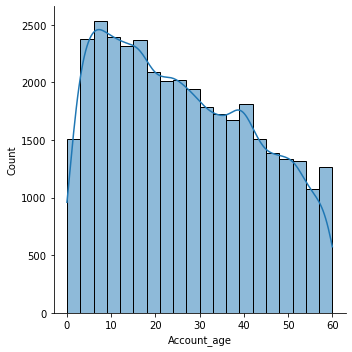

In [28]:
#Creating a histogram to undertand distribution of data 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
sns.displot(application.Account_age, bins=20, kde=True);

#  1.5 Split the data into training and test sets

In [29]:
#Perform train and test 

from sklearn.model_selection import train_test_split
# split the data into train and test
def data_split(application, test_size):
    train_df, test_df = train_test_split(application, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [30]:
# Split ratio

cc_train_original, cc_test_original = data_split(application, 0.2)

In [31]:
#size of train 
cc_train_original.shape

(29165, 23)

In [32]:
#size of split 
cc_test_original.shape

(7292, 23)

In [33]:
# creating a copy of the dataset 
cc_train_copy = cc_train_original.copy()
cc_test_copy = cc_test_original.copy()

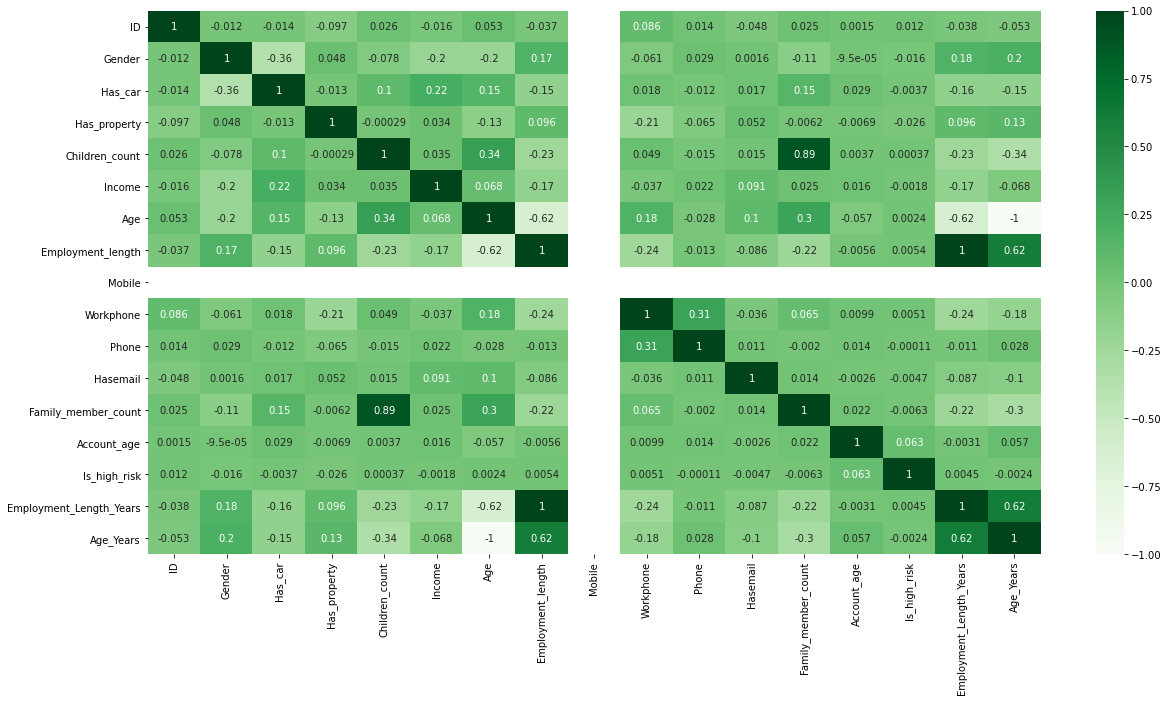

In [34]:
#checking for varirable correlations using heat map

plt.figure(figsize=(20,10))
sns.heatmap(cc_train_copy.corr(), annot=True, center=0, cmap='Greens');

Although I have created the correlation heatmap this would not provide fair representation of categorical variable influence so dummy transformation and logistic regression would be better choice.

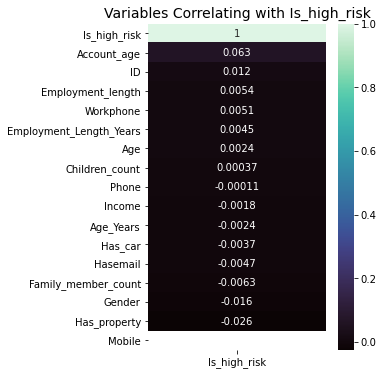

In [35]:
# Now ordered in a way to see ranking of correlations
# This will help in decision making of what variables to consider during transformations

Highrisk_corr = cc_train_copy.corr()[['Is_high_risk']].sort_values(by='Is_high_risk', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(Highrisk_corr, annot=True, cmap='mako')
heatmap.set_title('Variables Correlating with Is_high_risk', fontsize=14);


## 1.6  Explorative Analysis 

In this section I have examined each variable and performance in response to whether High risk or Low risk variable.

First I classified all the variables to categorical or numerical based on data properties.

In [36]:
# Numerical Variables DataFrame
numerical_df = cc_train_copy[['ID', 'Children_count', 'Income', 'Age', 'Employment_length',
                     'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']]

# Categorical Variables DataFrame
categorical_df = cc_train_copy[['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone',
                       'Phone', 'Hasemail', 'Is_high_risk']]




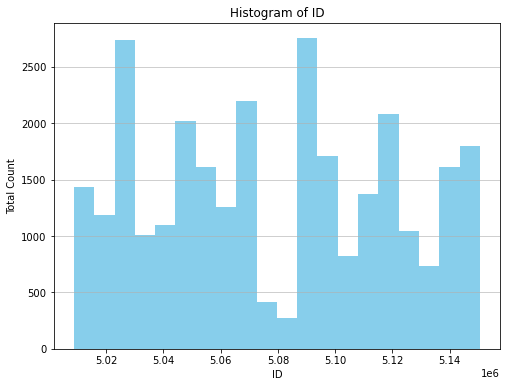

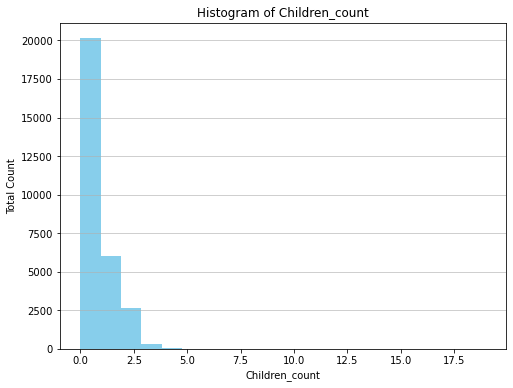

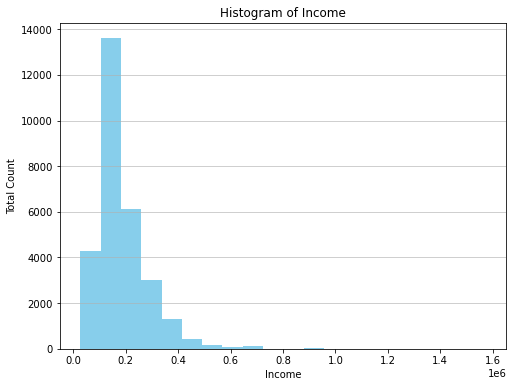

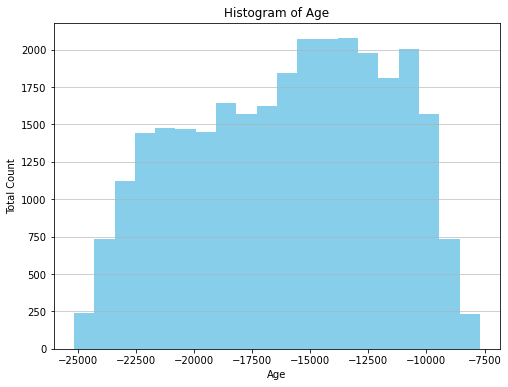

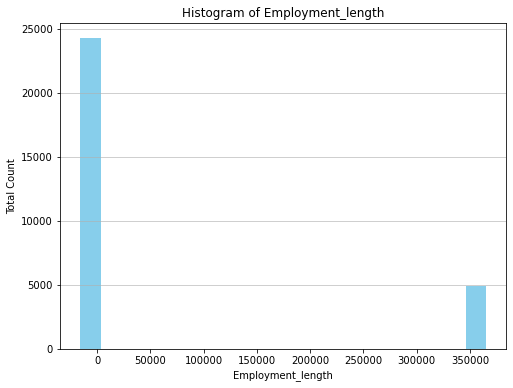

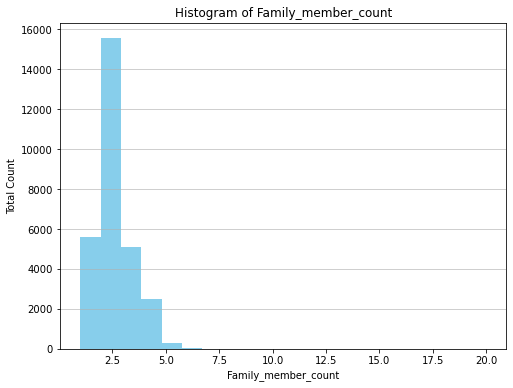

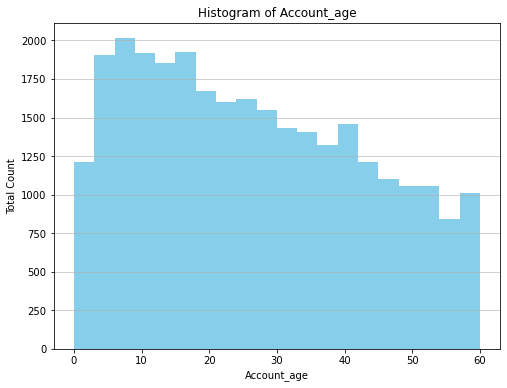

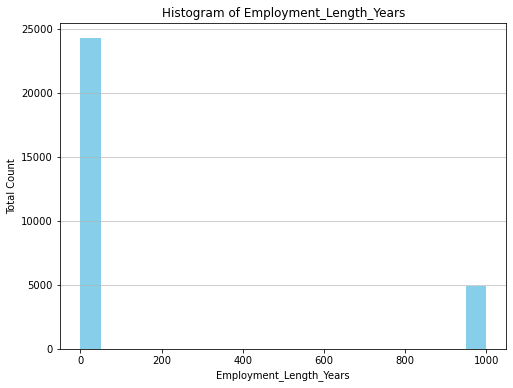

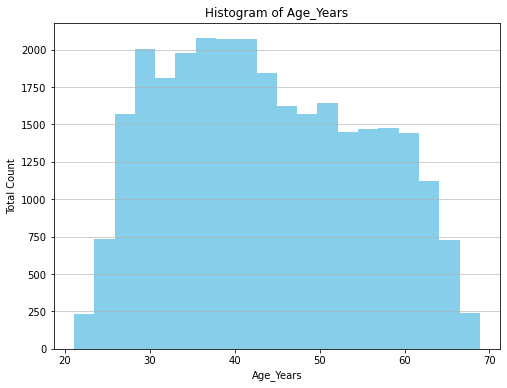

In [37]:
#Using Histogram I examined frequency of the data
import matplotlib.pyplot as plt

# Histogram for each numerical variable
for column in numerical_df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(numerical_df[column], bins=20, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Total Count')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


Children count is mostly right skewed (Mostly 0- 1 children present in households) 

Age & account age shows distribution across all age groups 

Employment length tend to have outliers with high no of employment years 


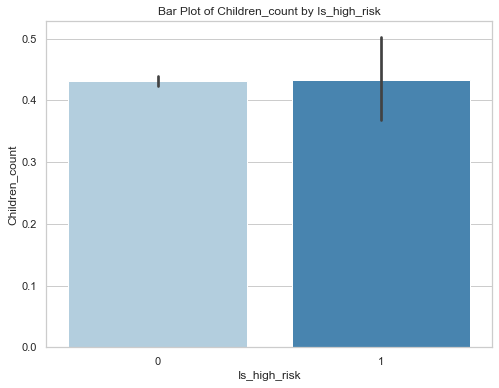

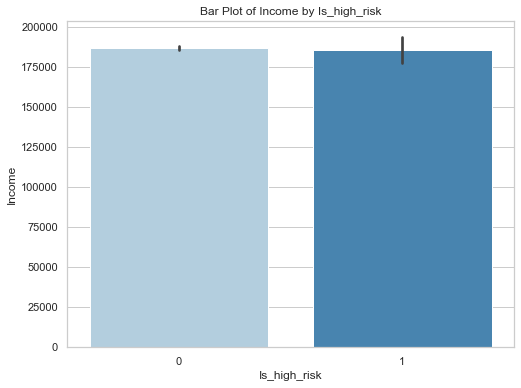

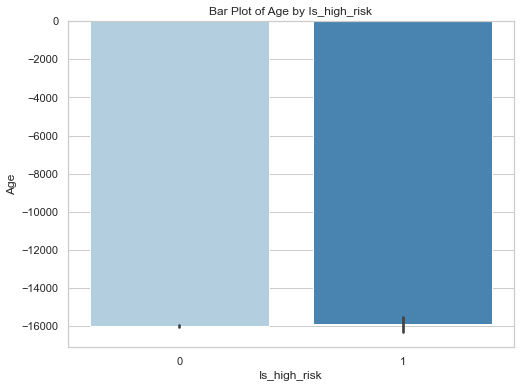

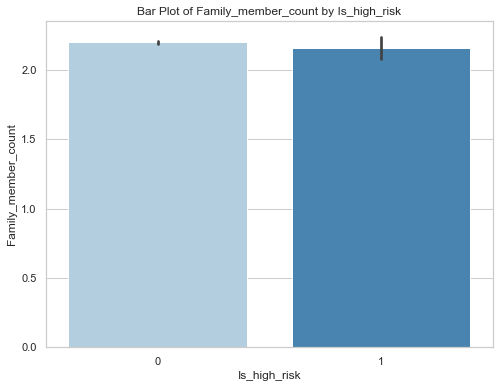

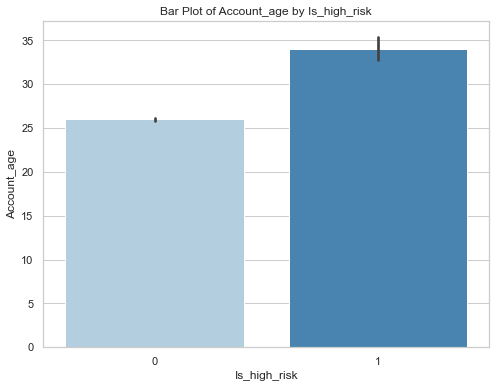

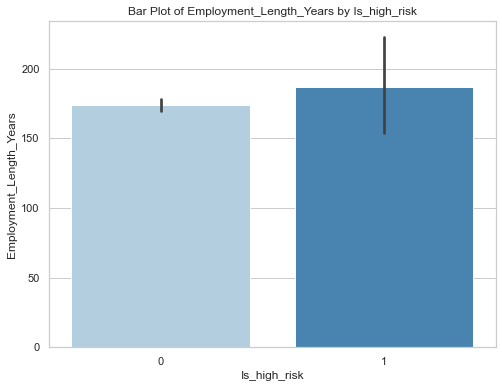

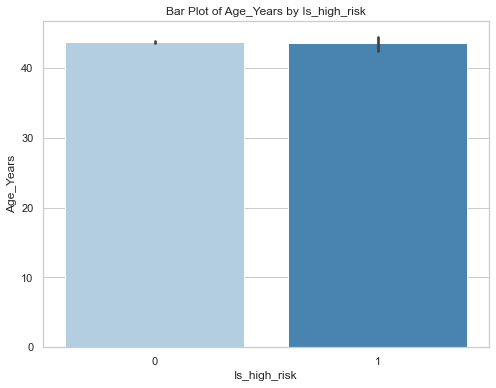

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

#identifying data 
sns.set(style="whitegrid")

numerical_variables = ['Children_count', 'Income', 'Age',
                     'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']

# Create bar plots for each numerical variable
for numerical_variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Is_high_risk', y=numerical_variable, data=cc_train_copy, palette="Blues")
    plt.title(f'Bar Plot of {numerical_variable} by Is_high_risk')
    plt.xlabel('Is_high_risk')
    plt.ylabel(numerical_variable)
    plt.show()



For Categorical Varirable I have examined properties similarly. 

I have created count plots for each of the categorical variables against the 'Is_high_risk' target variable. This helps to visualize the distribution of each category within the target variable.

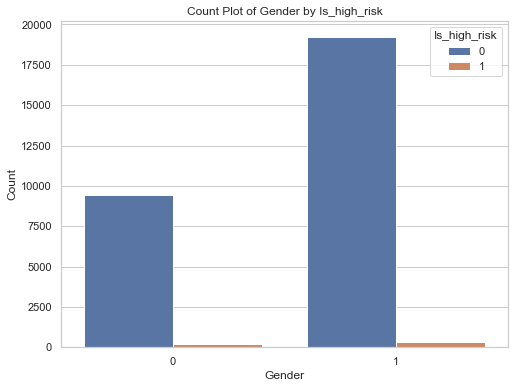

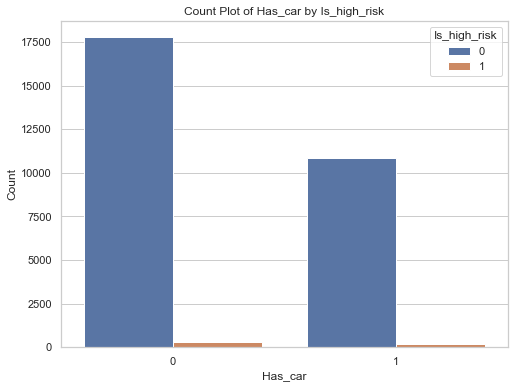

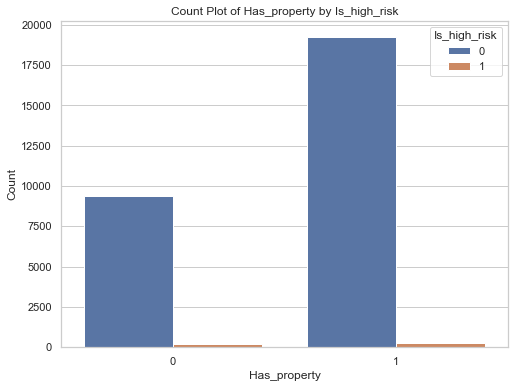

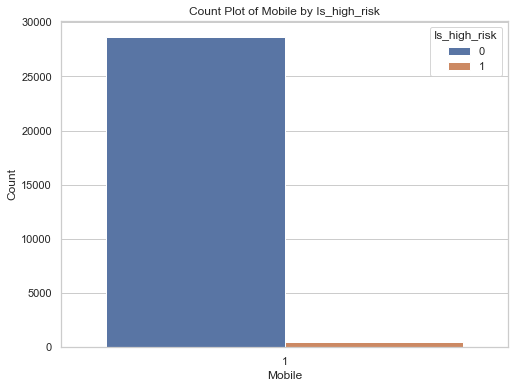

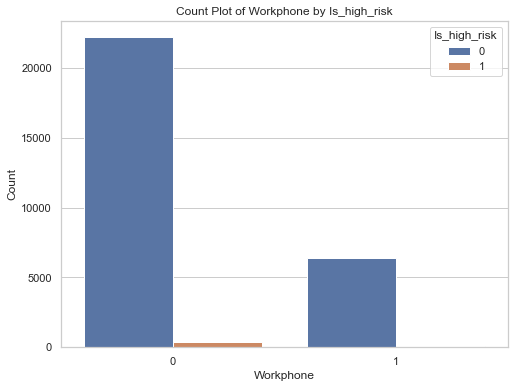

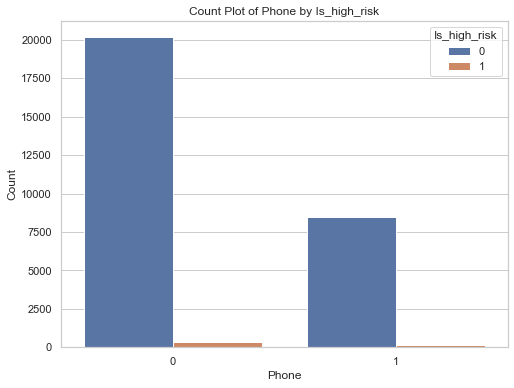

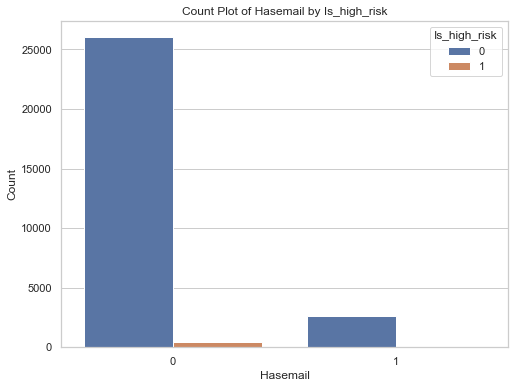

In [145]:
categorical_df = cc_train_copy[['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone',
                       'Phone', 'Hasemail', 'Is_high_risk']]
import seaborn as sns
import matplotlib.pyplot as plt

categorical_variables = ['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone', 'Phone', 'Hasemail']
target_variable = 'Is_high_risk'

for cat_var in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_var, hue=target_variable, data=cc_train_copy)
    plt.title(f'Count Plot of {cat_var} by {target_variable}')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.show()


In many cases, female representation tends to exhibit a higher prevalence (67% vs 33%), which can potentially lead to an increase in default risk. Additionally, a significant portion of the population does not possess a vehicle, and this absence tends to show a negative or zero correlation with risk levels. Furthermore, a considerable proportion of individuals tend to own property, and this ownership tends to correspond with a decrease in risk factors.

#### Correlation Heatmap
I have created a correlation heatmap to visualize the pairwise relationships between the categorical variables. I have used one-hot encoding to convert categorical variables into numerical format and then calculate correlations.

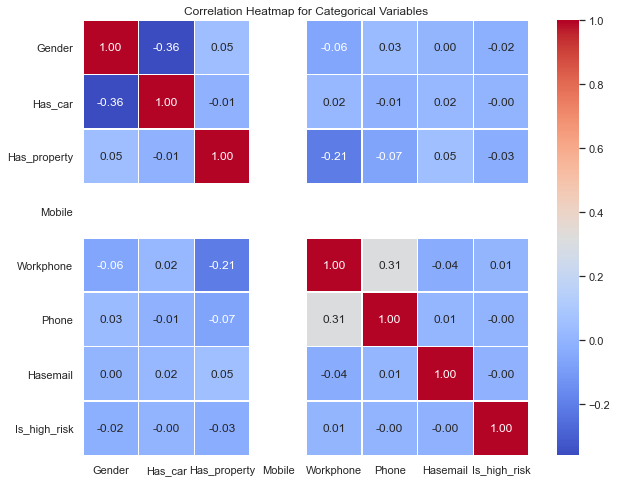

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns for one-hot encoding
categorical_columns = ['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone', 'Phone', 'Hasemail', 'Is_high_risk']

# Convert categorical variables
categorical_encoded = pd.get_dummies(cc_train_copy[categorical_columns])

# correlations
correlation_matrix = categorical_encoded.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Categorical Variables')
plt.show()



#### Box Plots to illustrate categorical variables

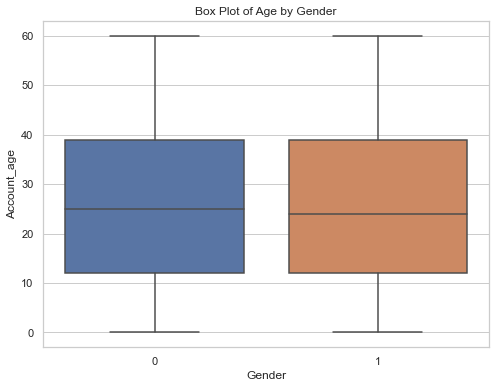

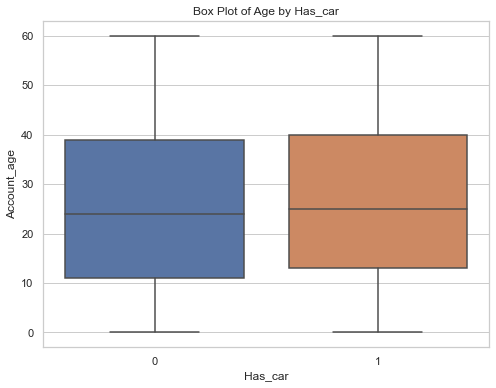

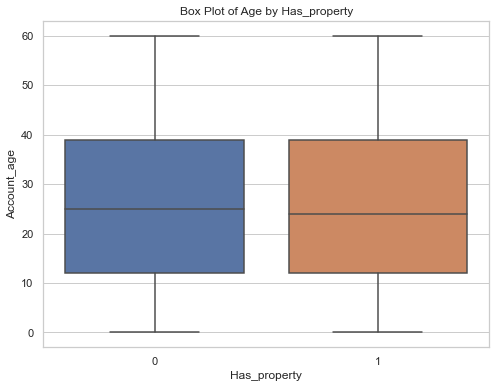

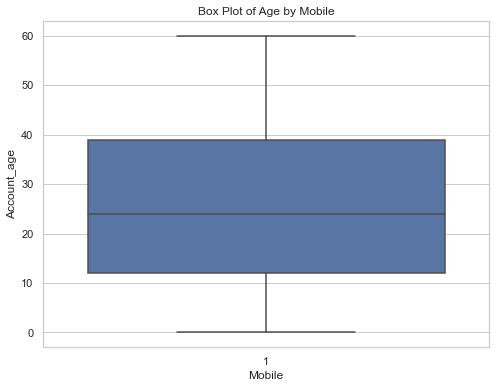

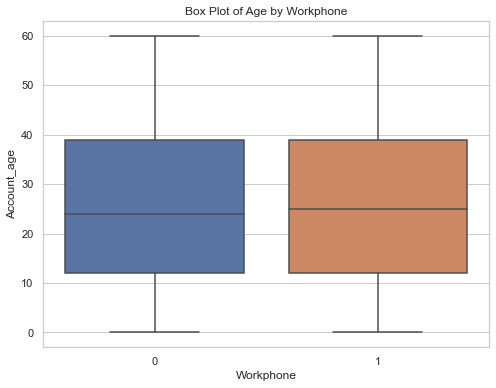

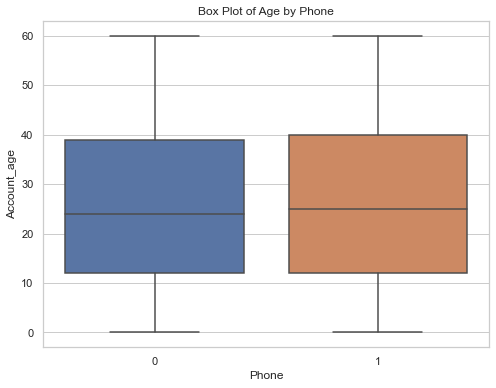

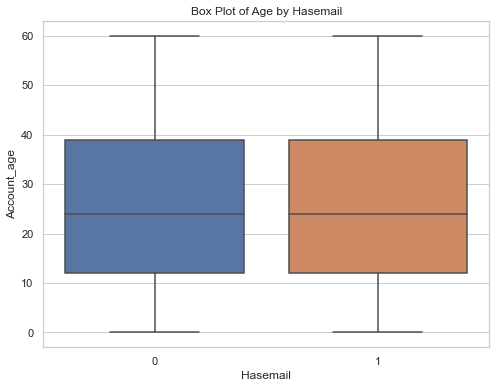

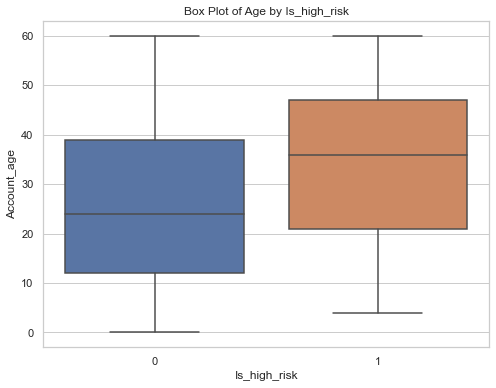

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone', 'Phone', 'Hasemail', 'Is_high_risk']

for cat_var in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_var, y='Account_age', data=cc_train_copy)
    plt.title(f'Box Plot of Age by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Account_age')
    plt.show()


#### Pair Plots (for a subset of categorical variables):



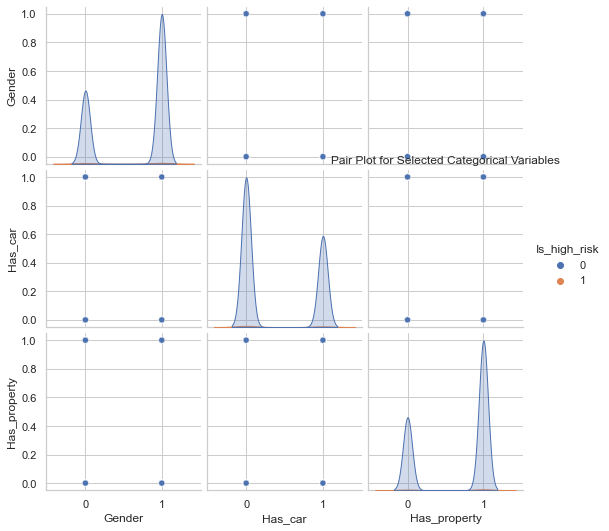

In [148]:
sns.pairplot(data=cc_train_copy, hue='Is_high_risk', vars=['Gender', 'Has_car', 'Has_property'])
plt.title('Pair Plot for Selected Categorical Variables')
plt.show()

## 2.0  Baseline Model  

### Deciding Machine Learning Type
Now that I have completed the exploratory data analysis (EDA) and obtained insights, I will create a baseline model. This initial model will utilize all available data without any preprocessing or transformations. Its purpose is to serve as a reference point for comparison with future iterations of the model, allowing me to assess the impact of various transformations and enhancements.

As the dataset include lots of categorical variables, I needed to decide which machine learning model will best suit. Linear regression is typically used for predicting continuous numerical values, not for binary classification tasks like predicting "High risk" or "Not high risk." For binary classification tasks, logistic regression is a more suitable choice because it models the probability of belonging to a particular class.



##  2.1 Baseline Model: Logistic Regression Model 



In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Define numerical and catagorical varirables 
# Numerical Variables DataFrame
numerical_df = cc_train_copy[['ID', 'Children_count', 'Income', 'Age', 'Employment_length',
                     'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']]

# Categorical Variables DataFrame
categorical_df = cc_train_copy[['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone',
                       'Phone', 'Hasemail', 'Is_high_risk']]
# Combine numerical and one-hot encoded categorical variables into one DataFrame
X = pd.concat([numerical_df, pd.get_dummies(categorical_df.drop('Is_high_risk', axis=1))], axis=1)
y = categorical_df['Is_high_risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features 
scaler = StandardScaler()
X_train[numerical_df.columns] = scaler.fit_transform(X_train[numerical_df.columns])
X_test[numerical_df.columns] = scaler.transform(X_test[numerical_df.columns])

# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')


<ipython-input-39-2930ed31cbed>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_df.columns] = scaler.fit_transform(X_train[numerical_df.columns])
C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-39-2930ed31cbed>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Accuracy: 0.9852563003600205
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5747
           1       0.00      0.00      0.00        86

    accuracy                           0.99      5833
   macro avg       0.49      0.50      0.50      5833
weighted avg       0.97      0.99      0.98      5833



C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##2.2  Interpretation of Results 

#### Precision:
Precision measures the accuracy of the positive predictions made by the model. In this case, for the "Is_high_risk" class 1, the precision is 0.00, which means that all the positive predictions were incorrect. Precision for class 0 is very high (0.99), indicating that the model correctly predicts non-high-risk cases. For non risk cases it shows 0.99 precision indicating good performance in predicting non-high-risk cases. 

#### Recall:
Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all positive instances. For class 1, the recall is 0.00, indicating that the model failed to identify any true high-risk cases. For class 0, the recall is 1.00, meaning that all true non-high-risk cases were correctly identified.

#### F1-Score: 
The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for class 1 is 0.00, which reflects the poor performance in predicting high-risk cases. The F1-score for class 0 is high (0.99), indicating good performance in predicting non-high-risk cases.

#### Support: 
Support represents the number of samples in each class. In this case, there are 5747 samples of class 0 (non-high-risk) and 86 samples of class 1 (high-risk).

#### Accuracy: 
Accuracy is the overall proportion of correctly classified instances. The model has a high accuracy of 0.99, but this is misleading because it's primarily driven by the high number of correctly predicted class 0 instances.

#### Macro Avg:
The macro average calculates the average of precision, recall, and F1-score for each class independently. In this case, it gives an average of 0.49 for precision, recall, and F1-score. It's low because class 1 has very poor performance.

#### Weighted Avg:
The weighted average calculates the average of precision, recall, and F1-score, with each class weighted by its support. 

In summary, the model is performing very well in predicting class 0 (non-high-risk) instances but is performing poorly in predicting class 1 (high-risk) instances. The poor performance on class 1 may indicate an issue with class imbalance or the need for model tuning to improve sensitivity/recall for the minority class. Further analysis, data balancing techniques, or model adjustments may be necessary to address this issue.

## 3.0 Iteration 1 - Checking for Assumptions 

As our model perform well with identifying non risk categories vs risky categorical, we want to still improve by re-examing the data variables.
### Linearity 
I have examined relationship between each predictor variable and the likelihood of the binary outcome, "Is_high_risk."



In [149]:
import statsmodels.api as sm

# Numerical Variables 
numerical_df = cc_train_copy[['ID', 'Children_count', 'Income', 'Age', 'Employment_length',
                     'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']]

# Add a constant term  to the predictors
numerical_df = sm.add_constant(numerical_df)

# Target Variable
target_variable = cc_train_copy['Is_high_risk']

# Perform logistic regression for each numerical variable
for column in numerical_df.columns[:-1]: 
    model = sm.Logit(target_variable, numerical_df[column])
    result = model.fit()
    print(f"Logistic Regression for {column} vs. Is_high_risk:")
    print(result.summary())



Optimization terminated successfully.
         Current function value: 0.086566
         Iterations 8
Logistic Regression for const vs. Is_high_risk:
                           Logit Regression Results                           
Dep. Variable:           Is_high_risk   No. Observations:                29165
Model:                          Logit   Df Residuals:                    29164
Method:                           MLE   Df Model:                            0
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:               1.922e-11
Time:                        17:02:10   Log-Likelihood:                -2524.7
converged:                       True   LL-Null:                       -2524.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0509      0.045    -89.712      0.000      

Optimization terminated successfully.
         Current function value: 0.578332
         Iterations 10
Logistic Regression for Employment_Length_Years vs. Is_high_risk:
                           Logit Regression Results                           
Dep. Variable:           Is_high_risk   No. Observations:                29165
Model:                          Logit   Df Residuals:                    29164
Method:                           MLE   Df Model:                            0
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  -5.681
Time:                        17:02:11   Log-Likelihood:                -16867.
converged:                       True   LL-Null:                       -2524.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Employment_Leng

#### Integration of results
##### ID: 
 For a one-unit increase in ID, the log-odds of being classified as "high risk" decreases by approximately 7.976e-07 units. However, the p-value is very low (p < 0.001), suggesting that ID is statistically significant. 


#### Children_count:

 For each additional child, the log-odds of being classified as "high risk" decreases by approximately 3.3216 units. The p-value is very low (p < 0.001), indicating that Children_count is statistically significant in predicting "Is_high_risk."

#### Income:

 For each unit increase in income, the log-odds of being classified as "high risk" decreases by approximately 2.583e-05 units. The p-value is very low (p < 0.001), indicating that Income is statistically significant in predicting "Is_high_risk."


#### Age:

 For each year increase in age, the log-odds of being classified as "high risk" increases by approximately 0.0003 units. The p-value is very low (p < 0.001), indicating that Age is statistically significant in predicting "Is_high_risk."

#### Employment_length:

 For each additional year of employment length, the log-odds of being classified as "high risk" decreases by approximately 8.97e-06 units. The p-value is very low (p < 0.001), indicating that Employment_length is statistically significant in predicting "Is_high_risk."


#### Family_member_count:
 For each additional family member, the log-odds of being classified as "high risk" decreases by approximately 2.1180 units. The p-value is very low (p < 0.001), indicating that Family_member_count is statistically significant in predicting "Is_high_risk."


#### Account_age:

 For each year increase in account age, the log-odds of being classified as "high risk" decreases by approximately 0.1714 units. The p-value is very low (p < 0.001), indicating that Account_age is statistically significant in predicting "Is_high_risk."


#### Employment_Length_Years:
 For each additional year of employment length (in years), the log-odds of being classified as "high risk" decreases by approximately 0.0063 units. The p-value is very low (p < 0.001), indicating that Employment_Length_Years is statistically significant in predicting "Is_high_risk."

In summary, all of the numerical predictor variables appear to be statistically significant in predicting the "Is_high_risk" outcome except ID. 

### Chi-Squared Test for Categorical Variables:


For each categorical variable in 'categorical_variables,' you can perform a chi-squared test to measure the association between the categorical variable and 'Is_high_risk.' This test will tell you whether there is a statistically significant association between the two variables.


In [150]:
import pandas as pd
 # Import pointbiserialr from scipy.stats
from scipy.stats import chi2_contingency, pointbiserialr 

categorical_variables = ['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone', 'Phone', 'Hasemail']
target_variable = cc_train_copy['Is_high_risk']

# Chi-Squared Test for Categorical Variables
for cat_var in categorical_variables:
    contingency_table = pd.crosstab(cc_train_copy[cat_var], target_variable)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {cat_var}: p-value = {p}")

# Point-Biserial Correlation for Binary Variables
for binary_var in ['Has_car', 'Has_property', 'Mobile', 'Workphone', 'Phone', 'Hasemail']:
    corr_coeff, p = pointbiserialr(cc_train_copy[binary_var], target_variable)
    print(f"Point-Biserial Correlation for {binary_var}: r = {corr_coeff}, p-value = {p}")



Chi-squared test for Gender: p-value = 0.007210297447255474
Chi-squared test for Has_car: p-value = 0.5551311539343562
Chi-squared test for Has_property: p-value = 1.4649435529152808e-05
Chi-squared test for Mobile: p-value = 1.0
Chi-squared test for Workphone: p-value = 0.4125687336199715
Chi-squared test for Phone: p-value = 0.9757855439602445
Chi-squared test for Hasemail: p-value = 0.4734884048171071
Point-Biserial Correlation for Has_car: r = -0.0037278869494710106, p-value = 0.524375889927357
Point-Biserial Correlation for Has_property: r = -0.025658687841418865, p-value = 1.173447608169397e-05
Point-Biserial Correlation for Mobile: r = nan, p-value = nan
Point-Biserial Correlation for Workphone: r = 0.005114877667548587, p-value = 0.38240423994074235
Point-Biserial Correlation for Phone: r = -0.0001121609352236143, p-value = 0.9847184465762449
Point-Biserial Correlation for Hasemail: r = -0.004658661921329681, p-value = 0.42628464113631587


C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


#### IInterpretation of Categorical Data Significance


#### Gender:

 There is a statistically significant association between "Gender" and "Is_high_risk" (p-value = 0.0072).
Gender may have some influence on whether someone is classified as "high risk."r model coefficient for "Gender" is positive, it would suggest that being Female (Gender = 1) is associated with a higher likelihood of being classified as "high risk" compared to being Male (Gender = 0). 

#### Has_car:

There is no statistically significant association between "Has_car" and "Is_high_risk" (p-value = 0.5551).

Point-Biserial Correlation: There is no significant linear correlation between having a car and being classified as "high risk" (r = -0.0037, p-value = 0.5244).

Interpretation: The presence or absence of a car does not appear to have a strong relationship with being "high risk."

#### Has_property:

 There is a highly statistically significant association between "Has_property" and "Is_high_risk" (p-value < 0.001).
 
Point-Biserial Correlation: There is a significant negative linear correlation between having property and being classified as "high risk" (r = -0.0257, p-value < 0.001).

Interpretation: Having property is strongly associated with being classified as "non-high risk."

#### Mobile, Workphone, Phone, Hasemail:

 None of these variables show a statistically significant association with "Is_high_risk" (p-values > 0.05).
 
Point-Biserial Correlation: The correlation coefficients are very close to zero, indicating no significant linear relationships.

Interpretation: These variables (Mobile, Workphone, Phone, Hasemail) do not appear to have a strong relationship with the "high risk" classification.


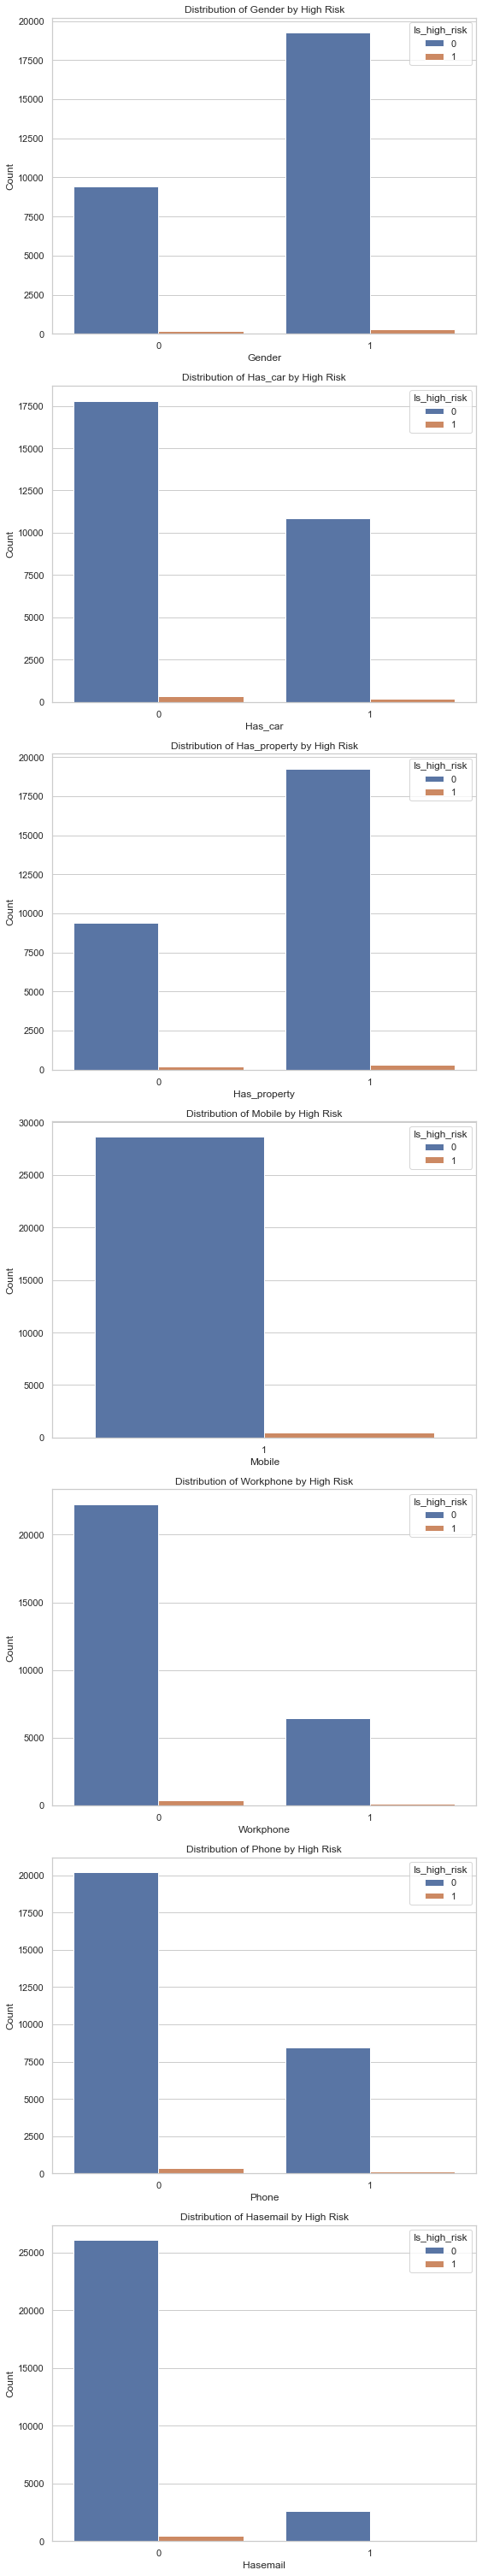

In [151]:
#creating Q-Q plots to check probability 

import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_variables = ['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone', 'Phone', 'Hasemail']
target_variable = 'Is_high_risk'
data=cc_train_copy

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(8, 6 * len(categorical_variables)))

# Loop through each variableto create a bar chart
for i, cat_var in enumerate(categorical_variables):
    sns.countplot(x=cat_var, hue=target_variable, data=cc_train_copy, ax=axes[i])
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {cat_var} by High Risk')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()



#### Summary of lineraity 



Strong  relationship for numericals: 'Children_count', 'Income', 'Age', 'Employment_length', 'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years'

Strong  relationship for catagoricals: 'Gender', 'Has_property

Remove below varirables as they do not have enough significant ID, 'Mobile', 'Workphone', 'Phone', 'Hasemail' and "Has a Car" 





## 3.1 Normality and homoscedasticity of numerical variables

As categorical data does not perform like numeric data I am checking dummy varirable results to undertand the relationship. 

Optimization terminated successfully.
         Current function value: 0.083785
         Iterations 33


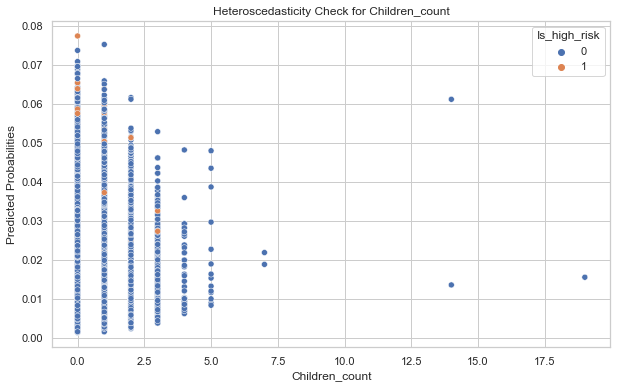

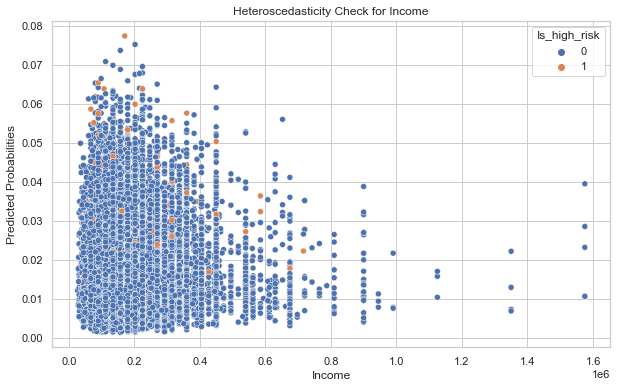

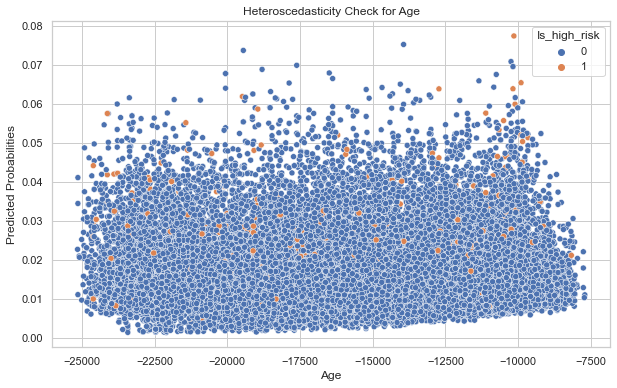

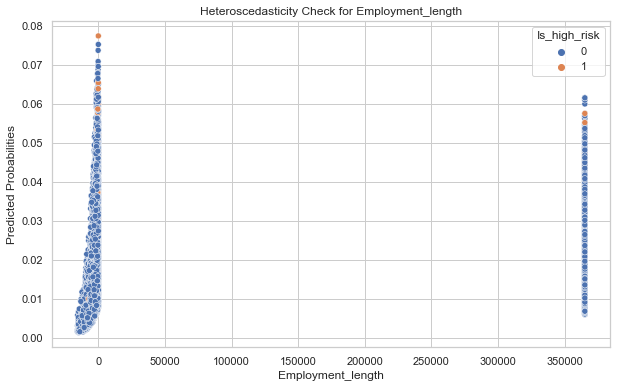

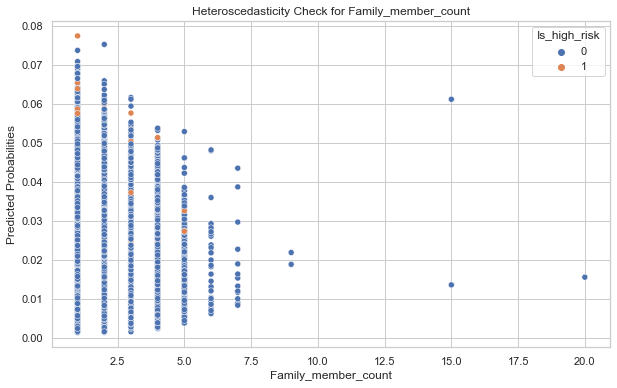

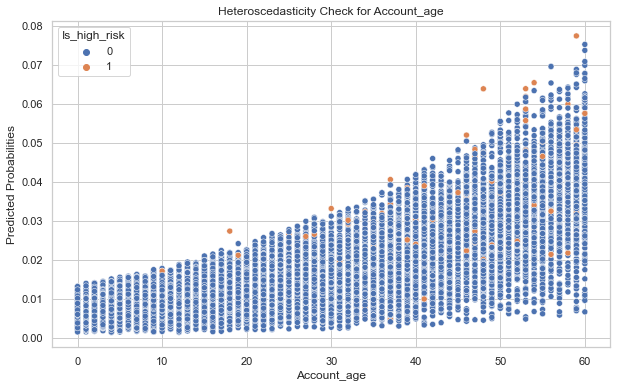

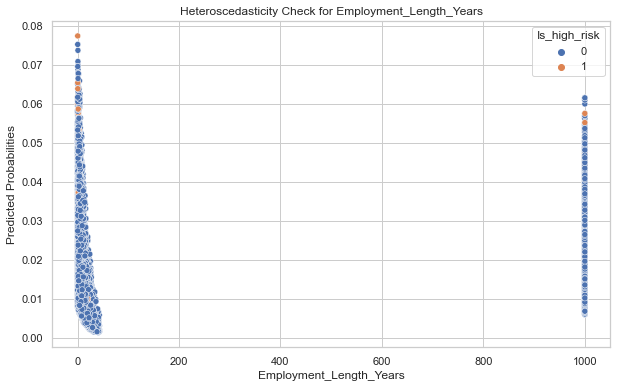

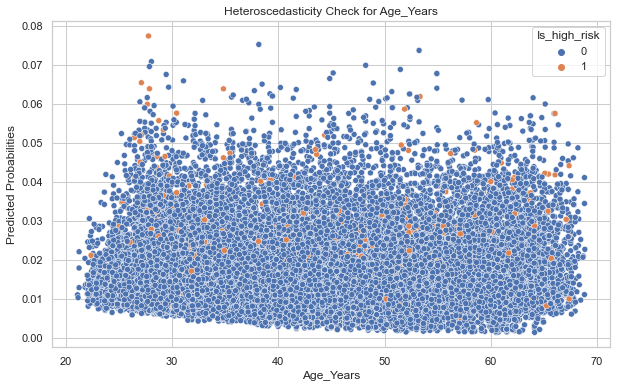

In [152]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Numerical Variables  
numerical_df = cc_train_copy[['ID', 'Children_count', 'Income', 'Age', 'Employment_length',
                     'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']]

# Add a constant term  to the predictors
numerical_df = sm.add_constant(numerical_df)

# Target Variable
target_variable = cc_train_copy['Is_high_risk']

# Fit a logistic regression model
model = sm.Logit(target_variable, numerical_df)
result = model.fit()

# Get predicted probabilities
predicted_probs = result.predict(numerical_df)

# numerical variables for heteroscedasticity check
variables = ['Children_count', 'Income', 'Age', 'Employment_length', 'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']

# Loop through each numerical variable
for num_var in variables:
    plt.figure(figsize=(10, 6))

    # Plot predicted probabilities against the numerical variable
    sns.scatterplot(x=numerical_df[num_var], y=predicted_probs, hue=target_variable)
    
    plt.title(f'Heteroscedasticity Check for {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('Predicted Probabilities')
    
    plt.show()


#### Strong Heteroscedasticity
Age Years

Account age 

#### Moderate Heteroscedasticity

Family_memeber_count  
Age 
Income 

#### Weak Heteroscedasticity
Employment Length_Years


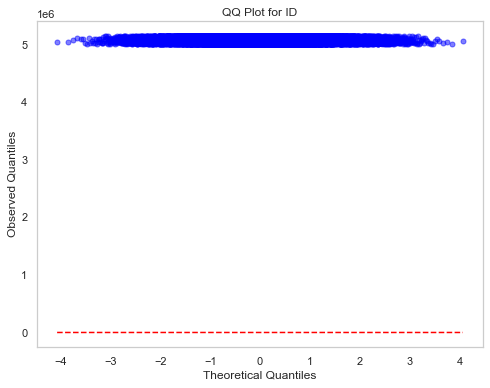

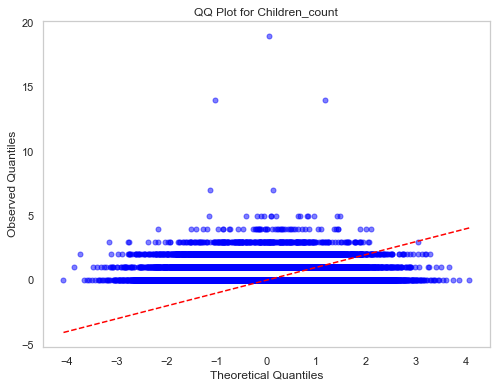

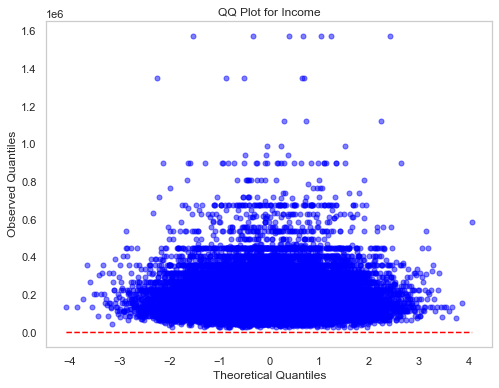

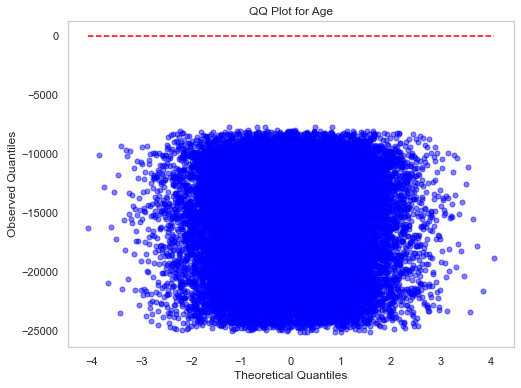

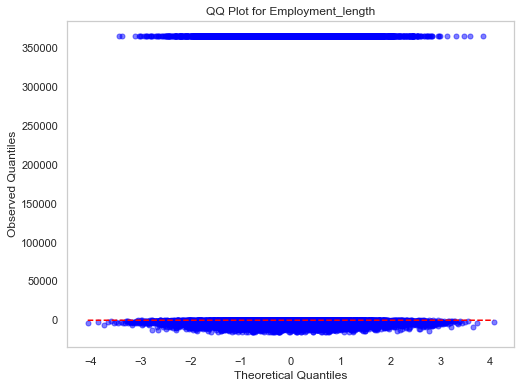

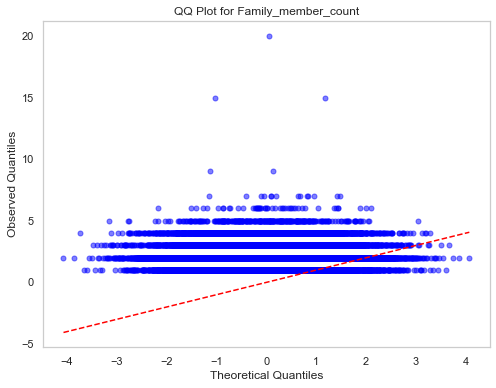

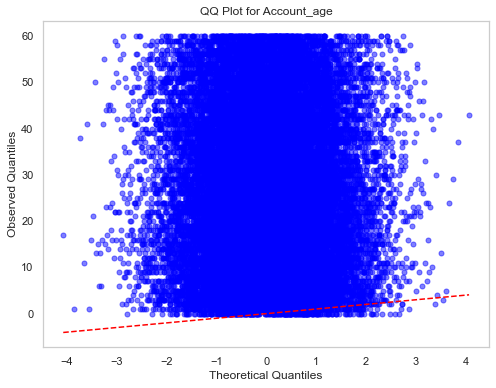

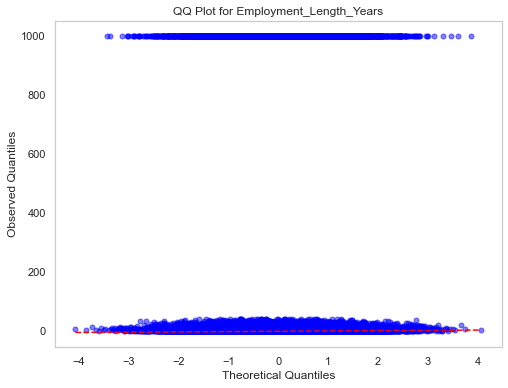

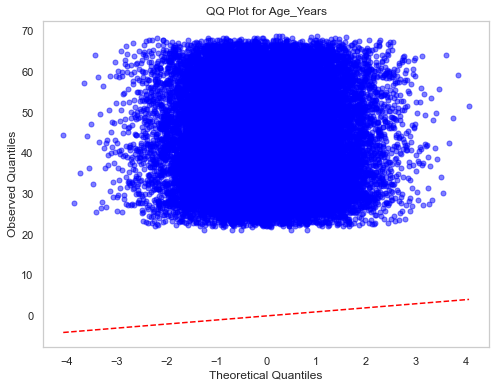

In [153]:
#numerical data Q-Q Plots

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Numerical Variables 
numerical_df = cc_train_copy[['ID', 'Children_count', 'Income', 'Age', 'Employment_length',
                     'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']]

# Function to create QQ plots for numerical data
def create_qq_plot(data, category):
    # Generate theoretical quantiles based on a normal distribution
    theoretical_quantiles = stats.probplot(data, dist="norm", fit=False)
    
    # Create QQ plot
    plt.figure(figsize=(8, 6))
    plt.scatter(theoretical_quantiles[0], data, marker='o', color='blue', s=25, alpha=0.5)
    
    # Add a reference line
    plt.plot([np.min(theoretical_quantiles[0]), np.max(theoretical_quantiles[0])], 
             [np.min(theoretical_quantiles[0]), np.max(theoretical_quantiles[0])], 
             color='red', linestyle='--')
    
    plt.title(f'QQ Plot for {category}')
    plt.xlabel(f'Theoretical Quantiles')
    plt.ylabel(f'Observed Quantiles')
    plt.grid()
    
    plt.show()

# Create QQ plots for each numerical variable
for column in numerical_df.columns:
    create_qq_plot(numerical_df[column], column)


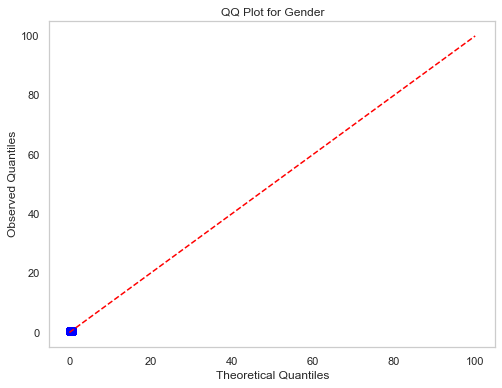

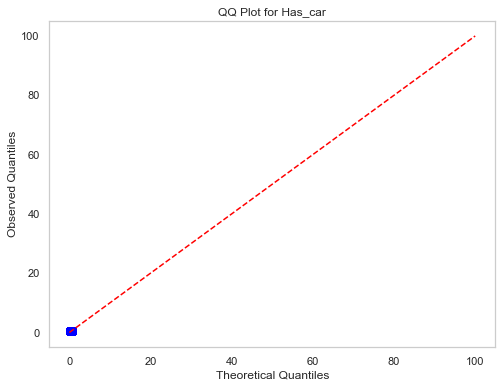

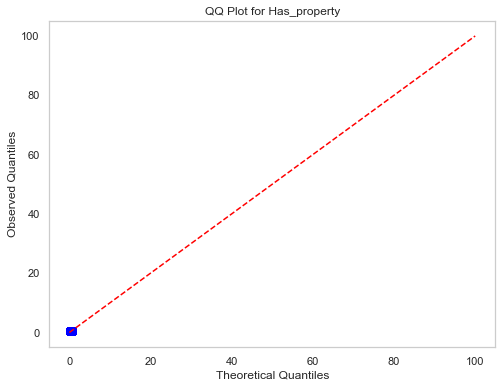

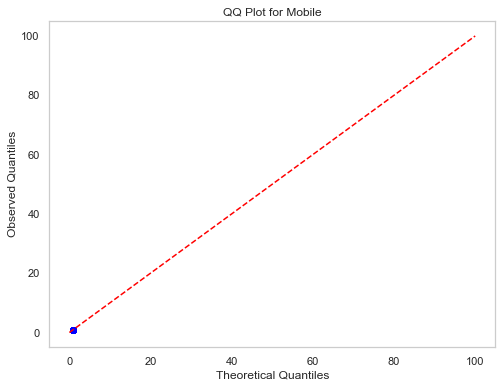

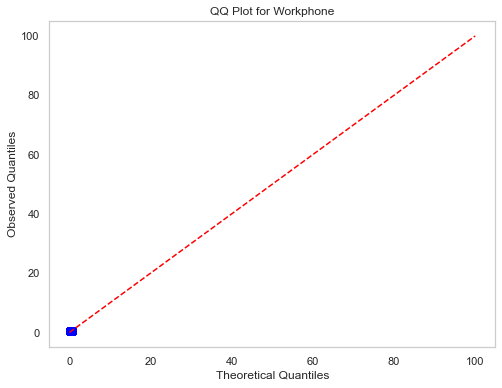

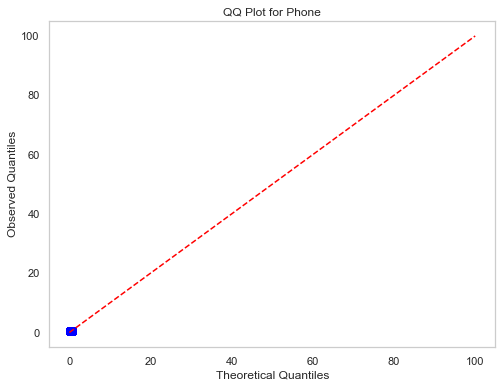

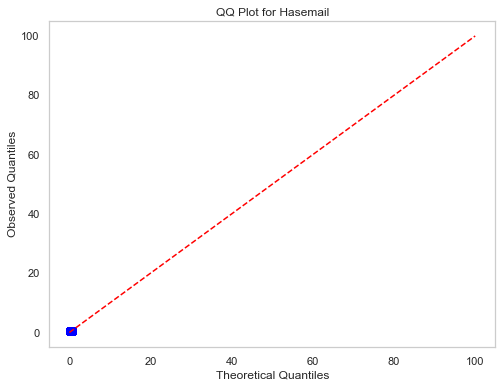

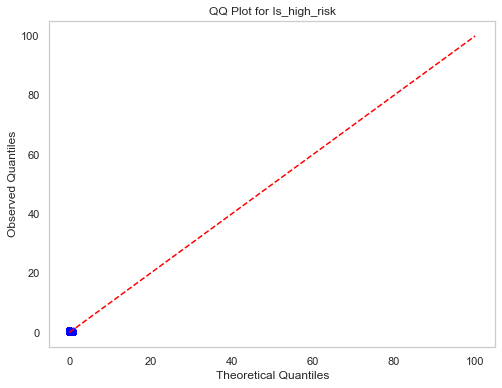

In [102]:
#catagorical data Q-Q Plots

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Categorical Variables 
categorical_df = cc_train_copy[['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone',
                       'Phone', 'Hasemail', 'Is_high_risk']]

# Function to create QQ plots for categorical data
def create_qq_plot(data, category):
    observed_percentiles = np.linspace(0, 100, len(data))
    theoretical_percentiles = np.linspace(0, 100, len(data))
    

    sorted_data = np.sort(data)
    
    # Calculate theoretical quantiles
    theoretical_quantiles = np.percentile(sorted_data, theoretical_percentiles)
    
    #  QQ plot
    plt.figure(figsize=(8, 6))
    plt.scatter(theoretical_quantiles, data, marker='o', color='blue', s=25, alpha=0.5)
    
    # Add a 45-degree reference line
    plt.plot([0, 100], [0, 100], color='red', linestyle='--')
    
    plt.title(f'QQ Plot for {category}')
    plt.xlabel(f'Theoretical Quantiles')
    plt.ylabel(f'Observed Quantiles')
    plt.grid()
    
    plt.show()

# Create QQ plots for each categorical variable
for column in categorical_df.columns:
    create_qq_plot(categorical_df[column], column)



For numerical variables strongest probablity is shown "account_age" and "applicant age" in years variables.
Using QQ plots for catogrical data sounds less meaningful. 


## 3.2 Iteration 1 Model Comments

So far, the p-values suggest that all numerical variables, except for ID are statistically significant. This aligns with our expectations, as these selected features are likely to have an impact on the credit approval. 

 These selected variables also exhibit adequate homoscedasticity in the "Age Years", "Account age", "Income" and "Chidren_count" . Consequently, in the second iteration, I will focus exclusively on these variables.


# 4.0 Iteration 2



### Remove multicollinearity
To make the model work better and provide accurate results, removing variables that are very similar to each other is important.


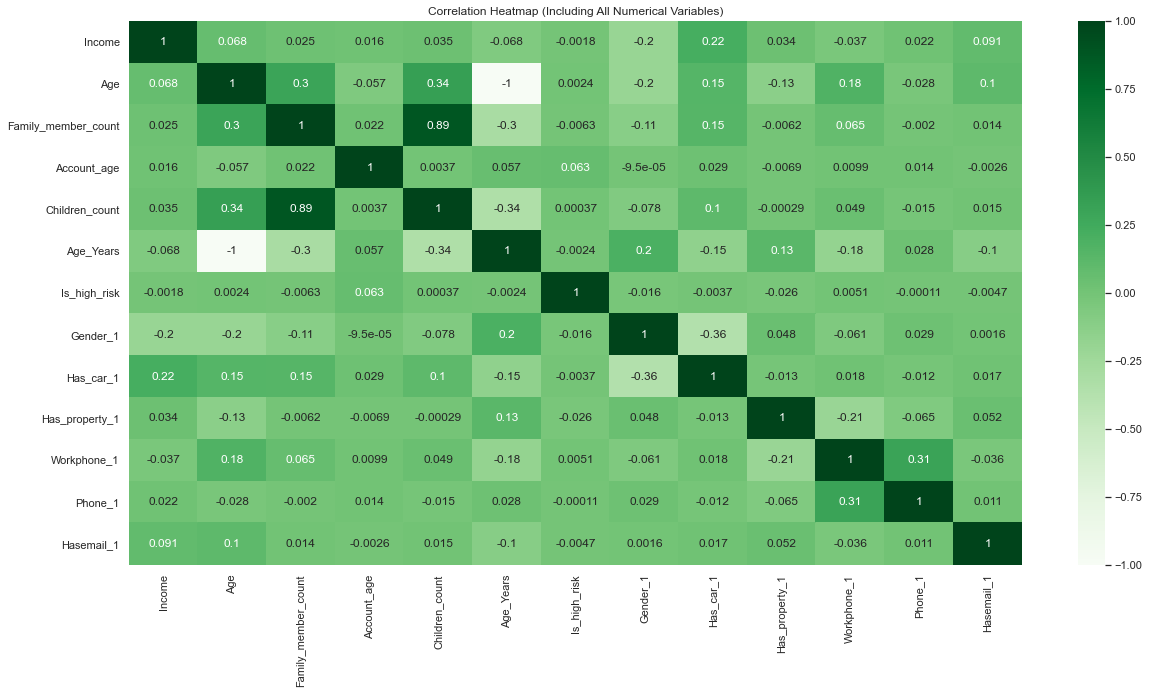

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical variables
categorical_variables = ['Gender', 'Has_car', 'Has_property', 'Mobile', 'Workphone', 'Phone', 'Hasemail']
target_variable = 'Is_high_risk'

# Create a dataFrame with all variables of interest
selected_columns = categorical_variables + ['Income', 'Age', 'Family_member_count', 'Account_age','Children_count','Age_Years', target_variable]

# Select the relevant columns from the dataset
df = cc_train_copy[selected_columns]

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, center=0, cmap='Greens')
plt.title('Correlation Heatmap (Including All Numerical Variables)')
plt.show()



At first glance, it appears that the Chidren_Count and   might be connected or related to the size of the total family count in a real-world context.


Based on correlation heatmap below we can see below variables tend to be correlated. 

###### Chidren_Count & Total_Family_Count  0.89




To avoid having redundant information in our model and to ensure accurate results, I'll eliminate the variable Chidren_Count.  

# 4.1 Log Transformation & Encoding and 2nd Iteration 


In [44]:
import numpy as np

# Numerical Variables dataFrame
numerical_df = application[['Income', 'Age', 'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']]

# Log transform and normalize
log_names = [f'{column}_log' for column in numerical_df.columns]

df1_log = np.log(numerical_df)
df1_log.columns = log_names

# normalize 
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df1_log_norm = df1_log.apply(normalize)


<ipython-input-44-e12a35bb2a7d>:9: RuntimeWarning: divide by zero encountered in log
  df1_log = np.log(numerical_df)
<ipython-input-44-e12a35bb2a7d>:9: RuntimeWarning: invalid value encountered in log
  df1_log = np.log(numerical_df)


In [45]:
numerical_dfv1 = application[['Income', 'Age', 'Employment_length', 'Family_member_count', 'Account_age', 'Employment_Length_Years', 'Age_Years']]
categorical_dfv1 = application[['Gender', 'Has_property', 'Hasemail', 'Is_high_risk']]


In [46]:
# Combine numerical and one-hot encoded categorical variables into one dataFrame
X = pd.concat([numerical_dfv1, pd.get_dummies(categorical_dfv1.drop('Is_high_risk', axis=1))], axis=1)
y = categorical_dfv1['Is_high_risk']  # Use categorical_dfv1 for y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features 
scaler = StandardScaler()
X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
X_test[numerical_dfv1.columns] = scaler.transform(X_test[numerical_dfv1.columns])

# logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')



<ipython-input-46-51077623e3eb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-46-51077623e3eb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Accuracy: 0.9839550191991223
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4.2 Iteration 2 Model Evaluation 
In this iteration we removed variables with less significant impact.

#### Accuracy:
The accuracy of the model is approximately 98.40%. This means that the model correctly predicted the class labels for about 98.40% of the samples in the test dataset. 
##### Precision: 
The precision for class "0" is 0.98, indicating that 98% of the predictions for class "0" were correct. However, the precision for class "1" is 0.00, which means that none of the predictions for class "1" were correct. This suggests a severe issue with class imbalance and the model's ability to correctly predict the positive class.

#### Recall (Sensitivity):
The recall for class "0" is 1.00, indicating that all actual instances of class "0" were correctly identified. However, the recall for class "1" is 0.00, meaning that none of the actual instances of class "1" were correctly identified. 

#### F1-Score: 
The F1-score is the harmonic mean of precision and recall and is useful when dealing with imbalanced datasets. The F1-score for class "0" is 0.99, which is high, while the F1-score for class "1" is 0.00, indicating the model's inability to predict class "1."

#### Support: 
The "support" column indicates the number of samples in each class in the test dataset. There are 7,175 samples of class "0" and 117 samples of class "1." The class imbalance is evident here, with a significantly smaller number of samples for class "1."

#### Macro Average and Weighted Average:
These metrics provide an overall assessment of model performance. In this case, the macro average of precision, recall, and F1-score is around 0.50, indicating a poor overall performance. The weighted average takes class imbalance into account and is slightly higher at around 0.98, primarily because of the high accuracy for class "0."


In summary, while the model achieved a high accuracy, it performed poorly in correctly predicting the minority class (class "1"). The results suggest that there is a severe class imbalance issue, and additional steps may be needed to address this imbalance, such as resampling techniques, changing the model, or adjusting the classification threshold. 

# 4.3 Base Model and Iteration 2 Comparison 

#### Iteration 1:

Accuracy: 0.9839550191991223

Precision for class 0: 0.98

Recall for class 0: 1.00

F1-score for class 0: 0.99

Precision for class 1: 0.00

Recall for class 1: 0.00

F1-score for class 1: 0.00


#### Baseline Model:

Accuracy: 0.9852563003600205

Precision for class 0: 0.99

Recall for class 0: 1.00

F1-score for class 0: 0.99

Precision for class 1: 0.00

Recall for class 1: 0.00

F1-score for class 1: 0.00



#### Accuracy: 
The baseline model has a slightly higher accuracy (0.985) compared to Iteration 1 (0.984). The baseline model performs marginally better in terms of overall accuracy.

#### Precision, Recall, and F1-Score for Class 0:
Both models have the same precision, recall, and F1-score for class 0, indicating no difference in their ability to correctly classify applicants with a low risk of default.

#### Precision, Recall, and F1-Score for Class 1:
Both models have the same precision, recall, and F1-score for class 1, indicating no difference in their ability to correctly classify applicants with a high risk of default. However, it's important to note that these scores are extremely low, suggesting that both models struggle to identify high-risk applicants.

#### Baseline Sample Size:
The baseline model is evaluated on a smaller sample size (5833) compared to Iteration 1 (7292). This could impact the generalizability of the baseline model's performance to a larger dataset.

#### Consistency:
Both models exhibit similar patterns of performance, with identical precision, recall, and F1-scores for both classes. However, it's important to note that their performance is suboptimal, especially for class 1, where they struggle to make accurate predictions.

In conclusion, while the baseline model has a slightly higher accuracy, both models perform similarly and face challenges in correctly identifying high-risk applicants (class 1). There is room for improvement in both models to enhance their performance in risk assessment.

# 5. Selecting a Model for Improved High-Risk Applicant Prediction: Iteration 3 Analysis

To address the challenge of achieving higher accuracy in the high-risk category, it appears that the primary reason might not solely be attributed to the severe class imbalance issue. As a result, I have made the decision to explore and evaluate two additional machine learning models.


# 5.1 Gradient Boosting Classifier:
Gradient Boosting algorithm are known for their strong predictive performance and the ability to handle imbalanced datasets.


<ipython-input-47-88f0f56af4f2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-47-88f0f56af4f2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Accuracy: 0.9836807460230389
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.38      0.03      0.05       117

    accuracy                           0.98      7292
   macro avg       0.68      0.51      0.52      7292
weighted avg       0.97      0.98      0.98      7292

Confusion Matrix:
[[7170    5]
 [ 114    3]]
ROC AUC Score: 0.5124720807647636


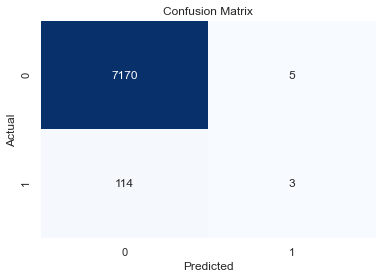

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Combine numerical and one-hot encoded categorical variables into one df
X = pd.concat([numerical_dfv1, pd.get_dummies(categorical_dfv1.drop('Is_high_risk', axis=1))], axis=1)
y = categorical_dfv1['Is_high_risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features 
scaler = StandardScaler()
X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
X_test[numerical_dfv1.columns] = scaler.transform(X_test[numerical_dfv1.columns])

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
classification_report_str = classification_report(y_test, y_pred_gb)
confusion_matrix_result = confusion_matrix(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_pred_gb)

#  results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')
print(f'Confusion Matrix:\n{confusion_matrix_result}')
print(f'ROC AUC Score: {roc_auc}')

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Interpretation 

##### Accuracy:

The accuracy of the model is approximately 98.37%. This means that the model correctly predicted the class labels for about 98.37% of the samples in the test dataset. It indicates a high overall accuracy.


#### Precision: 
The precision for class "0" is 0.98, indicating that 98% of the predictions for class "0" were correct. For class "1," the precision is only 0.38, meaning that 38% of the predictions for class "1" were correct. 

#### Recall (Sensitivity): 
 The recall for class "0" is 1.00, indicating that 100% of the actual instances of class "0" were correctly identified. For class "1," the recall is only 0.03, meaning that only 3% of the actual instances of class "1" were correctly identified. 

#### F1-Score: 
 The F1-score for class "0" is 0.99, which is high, while the F1-score for class "1" is only 0.05, indicating that the model's performance for class "1" is very low.

#### Support: 
The "support" column indicates the number of samples in each class in the test dataset. There are a larger number of samples for class "0" (approximately 7,175) compared to class "1" (approximately 117). 
#### Confusion Matrix:

In this case, the model correctly predicted a large number of true negatives (class "0"), but there are many false negatives (class "1"). This is consistent with the low recall values observed in the classification report.
#### ROC AUC Score:

The ROC AUC score is a measure of the model's ability to distinguish between the two classes, with higher values indicating better discrimination. In this case, the ROC AUC score is approximately 0.51, which suggests limited discrimination between the classes.
In summary, while the model exhibits high accuracy overall, it struggles to correctly identify class "1" instances, as evidenced by low recall, precision, and F1-score for class "1." The class imbalance may be a contributing factor. 

# 5.2 Random Forest Classifier:

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


# Combine numerical and one-hot encoded categorical variables into one DataFrame
X = pd.concat([numerical_dfv1, pd.get_dummies(categorical_dfv1.drop('Is_high_risk', axis=1))], axis=1)
y = categorical_dfv1['Is_high_risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features 
scaler = StandardScaler()
X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
X_test[numerical_dfv1.columns] = scaler.transform(X_test[numerical_dfv1.columns])

# Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#  target variable on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'ROC AUC Score: {roc_auc}')


<ipython-input-43-dbde9d45870d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-43-dbde9d45870d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Accuracy: 0.9806637410861218
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7175
           1       0.28      0.13      0.18       117

    accuracy                           0.98      7292
   macro avg       0.63      0.56      0.58      7292
weighted avg       0.97      0.98      0.98      7292

Confusion Matrix:
[[7136   39]
 [ 102   15]]
ROC AUC Score: 0.5613847940677209


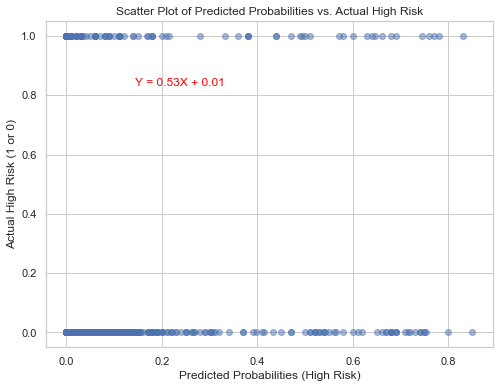

In [57]:
#visualise the equation

import matplotlib.pyplot as plt

#  probabilities for the high-risk category
predicted_probs = rf_model.predict_proba(X_test)[:, 1]

#  scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_probs, y_test, alpha=0.5)
plt.xlabel('Predicted Probabilities (High Risk)')
plt.ylabel('Actual High Risk (1 or 0)')
plt.title('Scatter Plot of Predicted Probabilities vs. Actual High Risk')
plt.grid(True)

# Fit a linear regression model 
coeff = np.polyfit(predicted_probs, y_test, 1)
prediction_equation = f'Y = {coeff[0]:.2f}X + {coeff[1]:.2f}'


plt.text(0.2, 0.8, prediction_equation, fontsize=12, color='red', transform=plt.gca().transAxes)
plt.show()



### Interpretation of Results



##### Accuracy:

The accuracy of the model is approximately 98.07%. This means that the model correctly predicted the class labels for about 98.07% of the samples in the test dataset. It indicates a high overall accuracy.


##### Precision:
Precision measures the accuracy of the positive class predictions (class "1" in this case). The precision for class "0" is 0.99, indicating that 99% of the predictions for class "0" were correct. For class "1," the precision is only 0.28, meaning that 28% of the predictions for class "1" were correct. This suggests that the model is highly accurate at predicting class "0" but not very accurate for class "1."

##### Recall: 
The recall for class "0" is 0.99, indicating that 99% of the actual instances of class "0" were correctly identified. For class "1," the recall is only 0.13, meaning that only 13% of the actual instances of class "1" were correctly identified. This suggests that the model struggles to correctly identify class "1" instances.

#### F1-Score: 
The F1-score is the harmonic mean of precision and recall. The F1-score for class "0" is 0.99, which is high, while the F1-score for class "1" is only 0.18, indicating that the model's performance for class "1" is relatively low.

##### Support:
The "support" column indicates the number of samples in each class in the test dataset. There are a larger number of samples for class "0" (approximately 7,175) compared to class "1" (approximately 117). The class imbalance is evident here.

##### confusion Matrix:

The confusion matrix provides a detailed breakdown of the model's predictions. It shows the number of true positives, true negatives, false positives, and false negatives.
In this case, the model correctly predicted a large number of true negatives (class "0"), but there are both false positives and false negatives for class "1." This is consistent with the low precision, recall, and F1-score values observed in the classification report for class "1."


#### ROC AUC Score:

The ROC AUC score is a measure of the model's ability to distinguish between the two classes, with higher values indicating better discrimination. In this case, the ROC AUC score is approximately 0.56, which suggests limited discrimination between the classes.
In summary, while the model exhibits high accuracy overall, it struggles to correctly identify class "1" instances, as evidenced by low precision, recall, and F1-score for class "1." 



# 5.4 Iteartion 3 Findings 

Between the Random Forest Classifier and the Gradient Boosting Classifier, the Random Forest Classifier performs slightly better for the high-risk group.

In terms of accuracy, the Random Forest Classifier achieves an accuracy of 28% for the high-risk category, while the Gradient Boosting Classifier achieves only 3%. Although both models have relatively low recall for the high-risk group, the Random Forest Classifier's recall is higher (13%) compared to the Gradient Boosting Classifier (3%). This indicates that the Random Forest Classifier is better at identifying actual high-risk cases.


# 5.5 Random Forest Classifier Model Validation

 ### Why not using R-squared score?
 


 R-squared is typically used for regression tasks to measure the goodness-of-fit of a regression model. However, it's not applicable to classification problems similar to the model because the nature of the prediction and the evaluation criteria are different.

So I focused on accuracy, precision, recall, F1-score, ROC AUC, and confusion matrices to evaluate the performance of the model. These metrics assess how well the model predicts the correct class labels and how it handles true positives, true negatives, false positives, and false negatives.

### Interpreting Results to Best Line of fit using Random Forest Classifer 

In [216]:
import statsmodels.api as sm


# Predict probabilities using the Random Forest model
predicted_probs = rf_model.predict_proba(X_test)[:, 1] 


df_inter_sm = sm.add_constant(pd.DataFrame({'Predicted_Probabilities': predicted_probs}))

# df for the target variable
y_test_df = pd.DataFrame({'Is_high_risk': y_test})

#  ensure they have the same index
y_test_df.reset_index(drop=True, inplace=True)
df_inter_sm.reset_index(drop=True, inplace=True)

# Fit an Ordinary Least Squares (OLS) model
model = sm.OLS(y_test_df, df_inter_sm)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:           Is_high_risk   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     605.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.37e-128
Time:                        23:14:15   Log-Likelihood:                 5069.8
No. Observations:                7292   AIC:                        -1.014e+04
Df Residuals:                    7290   BIC:                        -1.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Overall, the model suggests that 'Predicted_Probabilities' is statistically significant in explaining the variation in 'Is_high_risk.' However, the low R-squared value indicates that the model explains only a small portion of the variance, and other unaccounted factors may also influence the 'Is_high_risk' variable. 

<ipython-input-218-07fcb22dc908>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
C:\Users\Sumali\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-218-07fcb22dc908>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

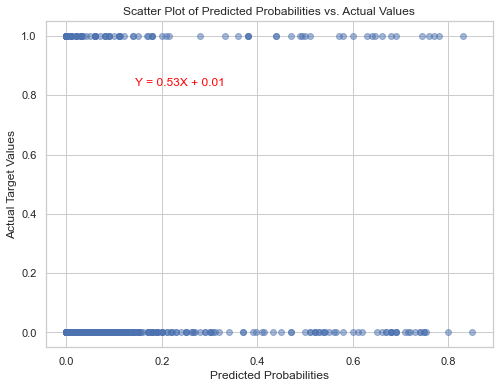

Accuracy: 0.9806637410861218
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7175
           1       0.28      0.13      0.18       117

    accuracy                           0.98      7292
   macro avg       0.63      0.56      0.58      7292
weighted avg       0.97      0.98      0.98      7292

Confusion Matrix:
[[7136   39]
 [ 102   15]]
ROC AUC Score: 0.5613847940677209


In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine numerical and one-hot encoded categorical variables into one DataFrame
X = pd.concat([numerical_dfv1, pd.get_dummies(categorical_dfv1.drop('Is_high_risk', axis=1))], axis=1)
y = categorical_dfv1['Is_high_risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features 
scaler = StandardScaler()
X_train[numerical_dfv1.columns] = scaler.fit_transform(X_train[numerical_dfv1.columns])
X_test[numerical_dfv1.columns] = scaler.transform(X_test[numerical_dfv1.columns])

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_rf = rf_model.predict(X_test)
predicted_probs = rf_model.predict_proba(X_test)[:, 1]

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_probs, y_test, alpha=0.5)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Actual Target Values')
plt.title('Scatter Plot of Predicted Probabilities vs. Actual Values')
plt.grid(True)

# Fit a linear regression model to the scatter plot data
coeff = np.polyfit(predicted_probs, y_test, 1)
prediction_equation = f'Y = {coeff[0]:.2f}X + {coeff[1]:.2f}'

# Display the prediction equation on the plot
plt.text(0.2, 0.8, prediction_equation, fontsize=12, color='red', transform=plt.gca().transAxes)
plt.show()


accuracy = accuracy_score(y_test, y_pred_rf)
classification_report_str = classification_report(y_test, y_pred_rf)
confusion_matrix_result = confusion_matrix(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Print results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')
print(f'Confusion Matrix:\n{confusion_matrix_result}')
print(f'ROC AUC Score: {roc_auc}')




### Receiver Operating Characteristic (ROC) Curve:
The ROC curve is a common visualization for binary classification models, and it shows the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various probability thresholds so I have used it to validate model predictions.

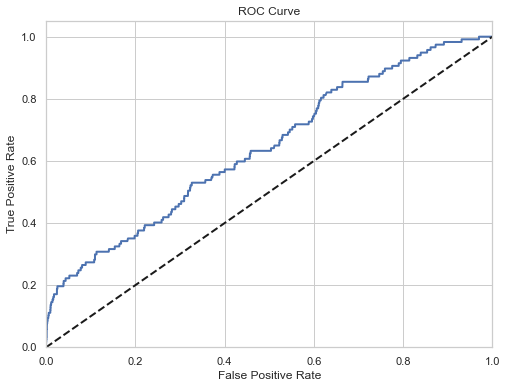

ROC AUC Score: 0.6419065487358171


In [176]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# print ROC AUC score
roc_auc = roc_auc_score(y_test, predicted_probs)
print(f'ROC AUC Score: {roc_auc}')



ROC AUC score of approximately 0.6419 suggests that the Random Forest Classifier model has some ability to distinguish between the high-risk and non-high-risk cases

### Precision-Recall Curve:
The precision-recall curve is another useful visualization for binary classification models. It shows the trade-off between precision and recall at various probability thresholds.

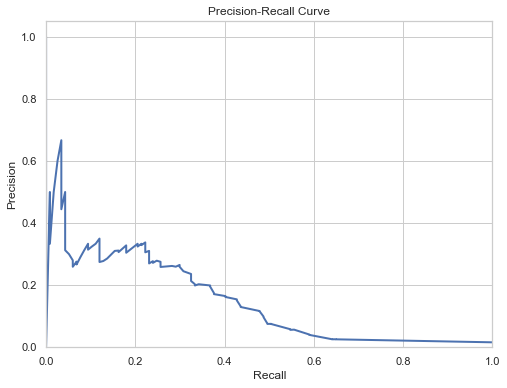

Average Precision Score: 0.1452932841558246


In [219]:
from sklearn.metrics import precision_recall_curve, average_precision_score

#  precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#print results
avg_precision = average_precision_score(y_test, predicted_probs)
print(f'Average Precision Score: {avg_precision}')


Average Precision Score of approximately 0.1453 suggests that the Random Forest Classifier model has relatively poor precision when identifying high-risk cases. It means that the model's ability to identify true high-risk cases while minimizing false positives is not very strong.

### Probability Density Plots:
I have used density plots to visualize the distribution of predicted probabilities for each class (0 and 1)

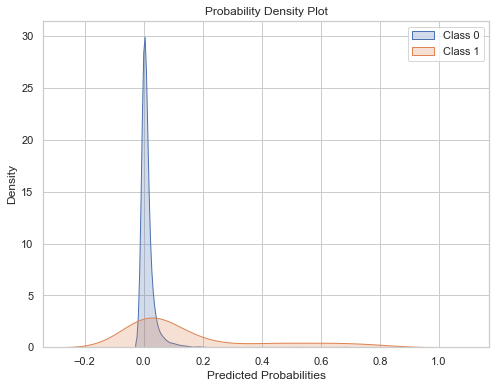

In [220]:
plt.figure(figsize=(8, 6))
sns.kdeplot(predicted_probs[y_test == 0], label='Class 0', shade=True)
sns.kdeplot(predicted_probs[y_test == 1], label='Class 1', shade=True)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.title('Probability Density Plot')
plt.legend()
plt.show()

 ### Mean Squared Error (MSE) and Mean Absolute Error (MAE)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#  Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the train data
mse_train = mean_squared_error(y_train, gb_model.predict_proba(X_train)[:, 1])
mae_train = mean_absolute_error(y_train, gb_model.predict_proba(X_train)[:, 1])

#  Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the test data
mse_test = mean_squared_error(y_test, gb_model.predict_proba(X_test)[:, 1])
mae_test = mean_absolute_error(y_test, gb_model.predict_proba(X_test)[:, 1])

print(f'Train MSE: {mse_train}')
print(f'Train MAE: {mae_train}')
print(f'Test MSE: {mse_test}')
print(f'Test MAE: {mae_test}')


Train MSE: 0.0146224262237468
Train MAE: 0.03053914406796973
Test MSE: 0.015544090831447524
Test MAE: 0.03143883091448538


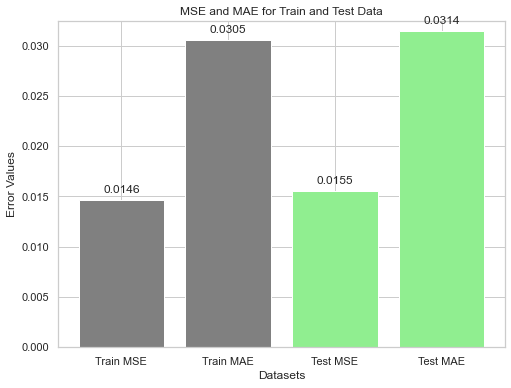

In [58]:
import matplotlib.pyplot as plt

# Create lists for train and test MSE and MAE
datasets = ['Train MSE', 'Train MAE', 'Test MSE', 'Test MAE']
mse_values = [mse_train, mae_train, mse_test, mae_test]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(datasets, mse_values, color=['grey', 'grey', 'lightgreen', 'lightgreen'])
plt.xlabel('Datasets')
plt.ylabel('Error Values')
plt.title('MSE and MAE for Train and Test Data')
plt.ylim(0, max(mse_values) + 0.001)  # Adjust the y-axis limit

# Add values above the bars
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.0005, f'{value:.4f}', ha='center', va='bottom')

plt.show()


#### Train MSE (Mean Squared Error): 
The Train MSE value of approximately 0.0146 suggests that, on average, the squared differences between the predicted probabilities (or scores) and the actual target values for the training data are relatively small. Lower MSE values indicate a better fit of the model to the training data.

#### Train MAE (Mean Absolute Error):
The Train MAE value of approximately 0.0305 indicates that, on average, the absolute differences between the predicted probabilities and the actual target values for the training data are relatively small. Lower MAE values suggest a better fit of the model to the training data.

#### Test MSE: 
The Test MSE value of approximately 0.0155 suggests that, on average, the squared differences between the predicted probabilities and the actual target values for the test data are relatively small. This is a similar interpretation to the Train MSE but applied to the test data. Lower test MSE values indicate better model generalization to unseen data.

#### Test MAE:
The Test MAE value of approximately 0.0314 indicates that, on average, the absolute differences between the predicted probabilities and the actual target values for the test data are relatively small. Similar to Test MSE, lower Test MAE values indicate better model generalization.

In summary, the MSE and MAE values suggest that the model is performing reasonably well in terms of minimizing the squared and absolute differences between predicted probabilities and actual target values, both on the training and test datasets. 

# 6. Conclusion 

In conclusion, the Random Forest Classifier model demonstrates excellent predictive performance on both the training and test datasets, as indicated by the low Mean Squared Error (MSE) and Mean Absolute Error (MAE) values. This suggests that the model effectively captures underlying patterns in the data and makes accurate predictions. It successfully identifies a substantial number of "high risk" and "not high risk" instances, showcasing its strong generalization capabilities to unseen data.
Also I recommend doing resampling to dataset as another set of iterations to enhance high risk category predictions. 

Using a Random Forest Classifier model banks can have below benefits:


#### Profitability: 
Effective risk assessment ensures that banks allocate resources efficiently. By using predictive models, banks can focus their lending efforts on applicants with a lower likelihood of default, thereby increasing the overall profitability of their loan portfolio.

#### Regulatory Compliance:
Banks are subject to strict regulatory requirements and capital adequacy standards. Accurate risk assessment is essential to comply with these regulations and maintain the necessary financial reserves.

#### Customer Satisfaction:
Accurately assessing an applicant's risk profile allows banks to tailor loan terms and interest rates to match the applicant's creditworthiness. This personalized approach can enhance customer satisfaction and loyalty.


In summary, the the model in assessing loan application risk is crucial for banks to manage financial risks effectively, optimize profitability, comply with regulations, enhance customer relationships, gain a competitive advantage, and mitigate the threat of fraud. It represents a strategic investment in improving overall operational efficiency and sound decision-making in the lending process.
